#### Devide images in 64 x 64 pixels patches

>- load packeges

In [1]:
import rasterio
import numpy as np
import os
import matplotlib.pyplot as plt
from pathlib import Path

>- Define operation functions

In [2]:
def load_geotiff(image_path):
    """Load a multispectral GeoTIFF image using rasterio."""
    with rasterio.open(image_path) as src:
        image = src.read()  # Reads all bands into a NumPy array
        profile = src.profile  # Save profile for GeoTIFF metadata
        nodata_val = src.nodata
    return image, profile, nodata_val

In [11]:
def extract_patches(image, nodata_val, patch_size=64):
    """Divide a multispectral image into non-overlapping patches."""
    bands, h, w = image.shape  # Get bands, height, and width
    patches = []

    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            if i + patch_size <= h and j + patch_size <= w:  # Ensure patch fits
                patch = image[:, i:i+patch_size, j:j+patch_size]  # Extract patch
                
                if nodata_val is not None and np.all(patch == nodata_val):
                    print(f":-( Skipping patch at ({i}, {j}) due to nodata values.")
                    continue
                if np.sum(patch) == 0 or np.average(patch) < 1:
                    print(f":-( Skipping patch at ({i}, {j}) due to low information content.")
                    continue
                patches.append(patch)
    
    return patches

In [12]:
def save_patches(patches, profile, output_dir="patches"):
    """Save extracted patches as separate GeoTIFF files."""
    os.makedirs(output_dir, exist_ok=True)

    for idx, patch in enumerate(patches):
        patch_filename = os.path.join(output_dir, f"patch_{idx}.tif")
        
        # Update profile for new patch size
        patch_profile = profile.copy()
        patch_profile.update({
            "height": patch.shape[1],
            "width": patch.shape[2],
            "count": patch.shape[0]
        })

        # Save patch as GeoTIFF
        with rasterio.open(patch_filename, "w", **patch_profile) as dst:
            dst.write(patch)

In [13]:
def visualize_patches(patches, num_patches_to_show=5):
    """Display random patches."""
    fig, axes = plt.subplots(1, num_patches_to_show, figsize=(15, 5))

    for ax in axes:
        idx = np.random.randint(0, len(patches))  # Pick random patch
        patch = patches[idx]
        
        # Convert to grayscale for visualization (show only the first band)
        patch_display = patch[0, :, :] if patch.shape[0] > 1 else patch.squeeze()
        
        ax.imshow(patch_display, cmap="gray")
        ax.axis("off")

    plt.show()

In [14]:
def main(image_path, save_dir):
    """Main function to process a GeoTIFF image."""
    image, profile, nodata_val = load_geotiff(image_path)
    patches = extract_patches(image, nodata_val)
    save_patches(patches, profile, output_dir=save_dir)
    visualize_patches(patches)

>- Load the multispectral image

In [15]:
base = Path('../../data/odm_img')

germination_path =Path(os.path.join(base, 'germination/odm_orthophoto.tif'))

grand_growth_path = os.path.join(base, 'grand_growth/odm_orthophoto.tif')

ripening_path = os.path.join(base, 'ripening/odm_orthophoto.tif')

tillering_path = os.path.join(base, 'tillering/odm_orthophoto.tif')

>- Create Patches
>>- germination

:-( Skipping patch at (0, 0) due to low information content.
:-( Skipping patch at (0, 64) due to low information content.
:-( Skipping patch at (2048, 0) due to low information content.
:-( Skipping patch at (2048, 64) due to low information content.
:-( Skipping patch at (2048, 128) due to low information content.
:-( Skipping patch at (2112, 0) due to low information content.
:-( Skipping patch at (2112, 64) due to low information content.
:-( Skipping patch at (2112, 128) due to low information content.
:-( Skipping patch at (2176, 0) due to low information content.
:-( Skipping patch at (2176, 64) due to low information content.
:-( Skipping patch at (2176, 128) due to low information content.
:-( Skipping patch at (2240, 0) due to low information content.
:-( Skipping patch at (2240, 64) due to low information content.
:-( Skipping patch at (2240, 128) due to low information content.
:-( Skipping patch at (2304, 0) due to low information content.
:-( Skipping patch at (2304, 64) 

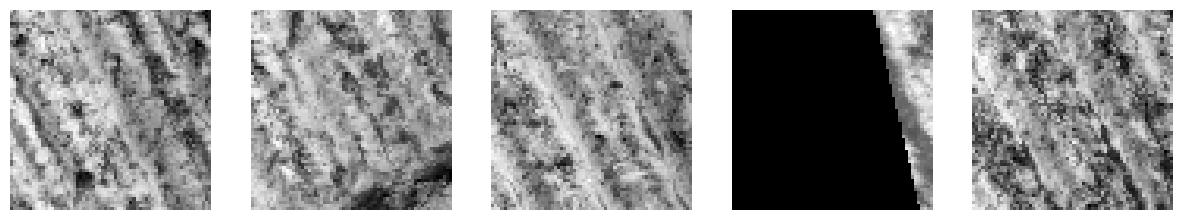

In [16]:
output_dir = Path(os.path.join(base, 'germination/patches'))
main(germination_path,output_dir)

>>- grand_growth

:-( Skipping patch at (0, 0) due to low information content.
:-( Skipping patch at (0, 320) due to low information content.
:-( Skipping patch at (0, 384) due to low information content.
:-( Skipping patch at (0, 448) due to low information content.
:-( Skipping patch at (0, 512) due to low information content.
:-( Skipping patch at (0, 576) due to low information content.
:-( Skipping patch at (0, 640) due to low information content.
:-( Skipping patch at (0, 704) due to low information content.
:-( Skipping patch at (0, 768) due to low information content.
:-( Skipping patch at (0, 832) due to low information content.
:-( Skipping patch at (0, 896) due to low information content.
:-( Skipping patch at (0, 960) due to low information content.
:-( Skipping patch at (0, 1024) due to low information content.
:-( Skipping patch at (0, 1088) due to low information content.
:-( Skipping patch at (0, 1152) due to low information content.
:-( Skipping patch at (0, 1216) due to low information

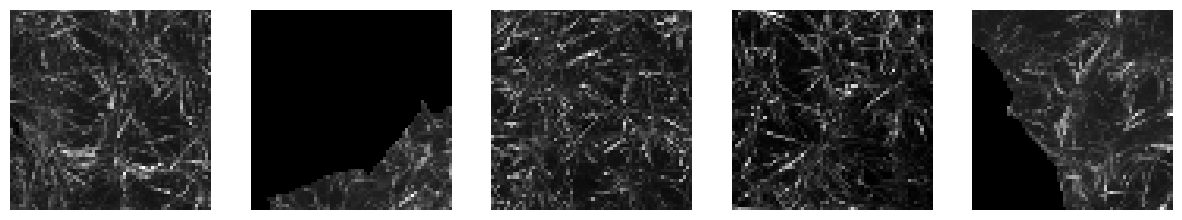

In [17]:
output_dir = Path(os.path.join(base, 'grand_growth/patches'))
main(grand_growth_path,output_dir)

>>- ripening

:-( Skipping patch at (0, 0) due to low information content.
:-( Skipping patch at (0, 64) due to low information content.
:-( Skipping patch at (0, 128) due to low information content.
:-( Skipping patch at (0, 960) due to low information content.
:-( Skipping patch at (0, 1024) due to low information content.
:-( Skipping patch at (0, 1088) due to low information content.
:-( Skipping patch at (0, 1152) due to low information content.
:-( Skipping patch at (0, 1216) due to low information content.
:-( Skipping patch at (0, 1280) due to low information content.
:-( Skipping patch at (0, 1344) due to low information content.
:-( Skipping patch at (0, 1408) due to low information content.
:-( Skipping patch at (0, 1472) due to low information content.
:-( Skipping patch at (0, 1536) due to low information content.
:-( Skipping patch at (0, 1600) due to low information content.
:-( Skipping patch at (0, 1664) due to low information content.
:-( Skipping patch at (0, 1728) due to low info

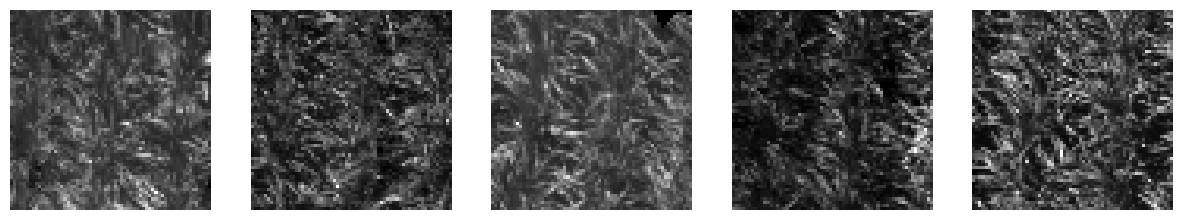

In [18]:
output_dir = Path(os.path.join(base, 'ripening/patches'))
main(ripening_path,output_dir)

>>- tillering

:-( Skipping patch at (0, 0) due to low information content.
:-( Skipping patch at (0, 64) due to low information content.
:-( Skipping patch at (0, 128) due to low information content.
:-( Skipping patch at (0, 192) due to low information content.
:-( Skipping patch at (0, 256) due to low information content.
:-( Skipping patch at (0, 320) due to low information content.
:-( Skipping patch at (64, 0) due to low information content.
:-( Skipping patch at (64, 64) due to low information content.
:-( Skipping patch at (64, 128) due to low information content.
:-( Skipping patch at (128, 0) due to low information content.
:-( Skipping patch at (1600, 0) due to low information content.
:-( Skipping patch at (1664, 0) due to low information content.
:-( Skipping patch at (1664, 64) due to low information content.
:-( Skipping patch at (1728, 0) due to low information content.
:-( Skipping patch at (1728, 64) due to low information content.
:-( Skipping patch at (1792, 0) due to low informat

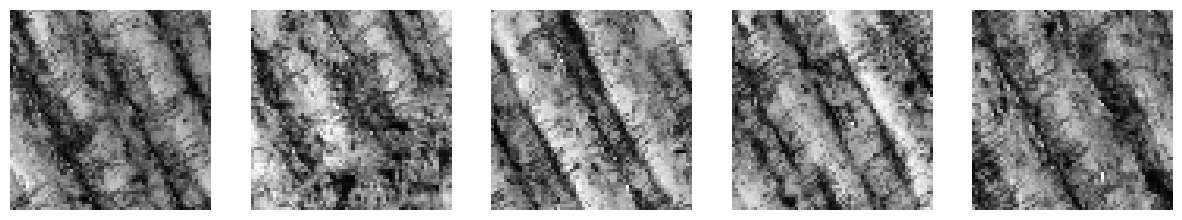

In [19]:
output_dir = Path(os.path.join(base, 'tillering/patches'))
main(tillering_path,output_dir)